<a href="https://colab.research.google.com/github/sohamgeek/expt-python-for-data-science-skill-sem-4-/blob/main/skill_expt_7_and_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/winequality-red.csv"  # Ensure the file is uploaded
df = pd.read_csv(file_path, sep=";")  # UCI wine dataset uses ';' as a separator


In [ ]:
# Display first few rows
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Separate features and target
X = df.drop(columns=['quality'])  # 'quality' is the target column
y = df['quality']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Dataset Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  


Selected Features (Variance Threshold): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


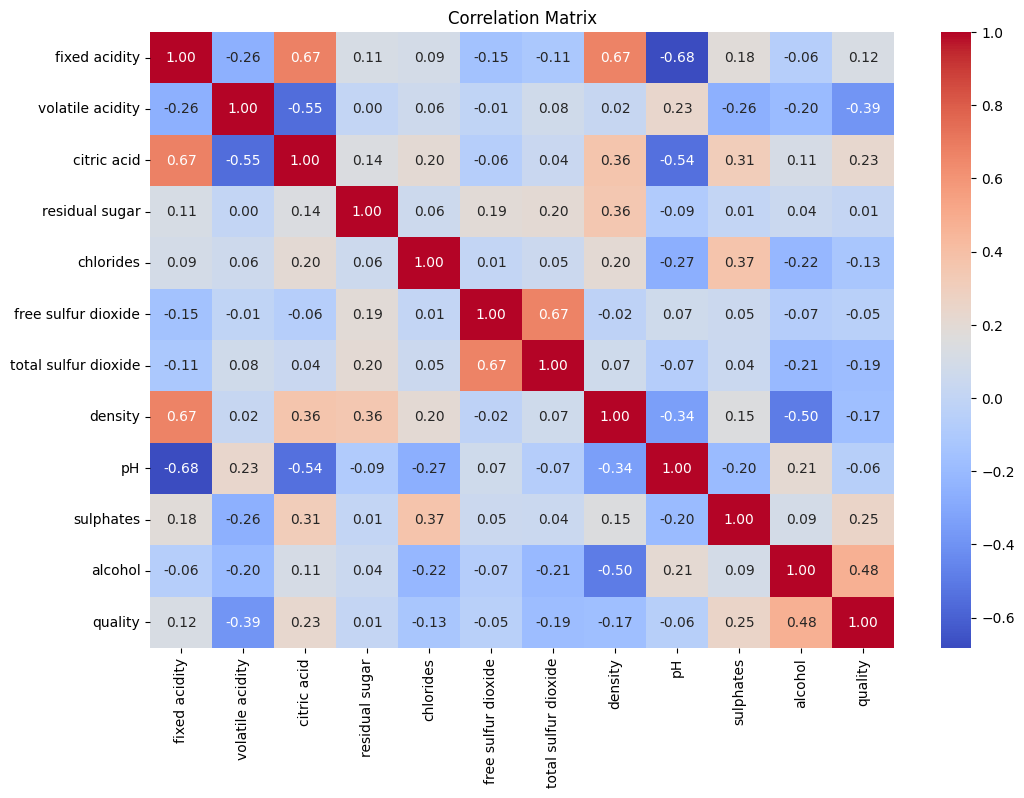


Selected Features (Chi-Square Test): ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [ ]:
# 1️⃣ Variance Threshold Method
vt = VarianceThreshold(threshold=0.01)  # Removes features with low variance
X_vt = vt.fit_transform(X_scaled_df)
selected_features_vt = X_scaled_df.columns[vt.get_support()]
print("\nSelected Features (Variance Threshold):", selected_features_vt.tolist())

# 2️⃣ Correlation Matrix (to remove highly correlated features)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling (0 to 1) instead of Standardization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Chi-Square Test (for categorical feature selection)
X_chi2 = SelectKBest(score_func=chi2, k=5)  # Selecting top 5 features
X_chi2.fit_transform(X_scaled, y)
selected_features_chi2 = X.columns[X_chi2.get_support()]
print("\nSelected Features (Chi-Square Test):", selected_features_chi2.tolist())


Feature Importance using Mutual Information:
 alcohol                 0.175274
volatile acidity        0.148144
sulphates               0.108972
total sulfur dioxide    0.087135
density                 0.078484
citric acid             0.063279
fixed acidity           0.058469
free sulfur dioxide     0.050152
chlorides               0.041583
residual sugar          0.021996
pH                      0.016721
dtype: float64


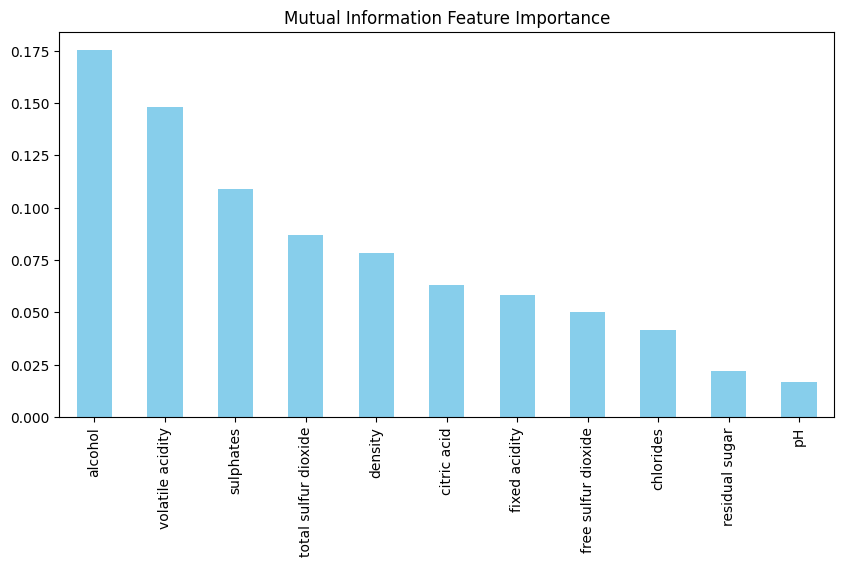


ANOVA F-Test Results:
                  Feature     F-Score       p-Value
10               alcohol  468.267011  2.831477e-91
1       volatile acidity  287.444450  2.051715e-59
9              sulphates  107.740433  1.802088e-24
2            citric acid   86.257726  4.991295e-20
6   total sulfur dioxide   56.657818  8.621703e-14
7                density   50.405223  1.874957e-12
4              chlorides   26.985608  2.313383e-07
0          fixed acidity   24.960038  6.495635e-07
8                     pH    5.340462  2.096278e-02
5    free sulfur dioxide    4.108502  4.283398e-02
3         residual sugar    0.301184  5.832180e-01


In [ ]:
#EXPT 8
from sklearn.feature_selection import mutual_info_regression, f_regression

# 1️⃣ Mutual Information for feature selection
mi_scores = mutual_info_regression(X_scaled, y)
mi_feature_importance = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance using Mutual Information:\n", mi_feature_importance)

# Plot Mutual Information Scores
plt.figure(figsize=(10, 5))
mi_feature_importance.plot(kind='bar', color='skyblue')
plt.title("Mutual Information Feature Importance")
plt.show()

# 2️⃣ ANOVA F-Test for feature selection
f_scores, p_values = f_regression(X_scaled, y)
anova_results = pd.DataFrame({"Feature": X.columns, "F-Score": f_scores, "p-Value": p_values})
anova_results = anova_results.sort_values(by="F-Score", ascending=False)

print("\nANOVA F-Test Results:\n", anova_results)